## 学习和使用Logstic回归

* 复习教材第5章内容，调试运行相关代码。
* 基于教材随机梯度上升算法实现小批量随机梯度上升算法，以疝气病马数据集进行训练和测试，并与教材中的算法进行比较。
* 查阅scikit-learn工具包中Logistic回归学习器的相关说明，了解相关函数使用方法。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Logistic回归实现与最优化方法

使用Logistic回归进行分类的基本思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。

在两个类的情况下，想要的函数应该输出0或1，这类函数称为单位阶跃函数。该函数在跳跃点上从0瞬间跳跃到1，这个瞬间跳跃过程有时很难处理，而Sigmoid函数有类似的性质，从数学上更容易处理：

$$
y = \dfrac{1}{1+e^{-z}}
$$

## 批量梯度上升BGA

sigmoid函数的输入 $z$ 可由下面公式得出

$$
z = w_0x_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
\\ 或 \\
z = \boldsymbol{w}^T\boldsymbol{x}
$$

梯度上升法的基本思想是：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。函数 $f(x,y)$ 的梯度由下式表示：

$$
\nabla f(x,y) = \left(
\begin{align}
\dfrac{\partial f(x,y)}{\partial x} \\
\dfrac{\partial f(x,y)}{\partial y} 
\end{align}
\right)
$$

梯度算子总是指向函数值增长最快的方向，而移动量的大小由步长 $\alpha$ 决定。梯度上升算法的迭代公式如下：

$$
w := w+\alpha \nabla_w f(w)
$$

该公式将一直被迭代执行，直至达到某个停止条件（例如迭代次数达到某个指定值或算法达到某个可以允许的误差范围）。

> 对应地，梯度下降算法公式为 $w := w-\alpha \nabla_w f(w)$

梯度上升法的伪代码如下：

>* 每个回归系数初始化为1
>* 重复R次
>   * 计算整个数据集的梯度
>   * 使用alpha × gradient更新回归系数的向量
>   * 返回回归系数

In [2]:
## 5-1 Logistic回归梯度上升优化算法

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('./data/testSet6.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001 # 步长
    maxCycles = 500 # 迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):              
        h = sigmoid(dataMatrix*weights)     
        error = (labelMat - h)              # 计算真实类别与预测的差值
        weights = weights + alpha * dataMatrix.transpose()* error #按照差值方向调整回归系数
    return weights

In [3]:
dataArr, labelMat = loadDataSet()

该方法加载了一个100行的数据集，每行数据三列分别为X1、X2和标签。对数据部分增加一列X0设置初始值为1.

In [4]:
display(dataArr[:3])

[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862]]

In [5]:
display(labelMat[:3])

[0, 1, 0]

使用梯度上升方法计算权值。在`gradAscnt()`方法中已经设定好目标移动步长 $\alpha$ 值和迭代次数 `maxCycles`。程序在数据集上自动迭代计算$w := w+ \alpha \nabla_w f(w)$

按照差值方向、设定的步长调整回归系数。500次迭代后计算出权值：

In [6]:
weights = gradAscent(dataArr, labelMat)
display(weights)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 可视化决策边界

仅有权值，看着还是比较抽象的，可以使用 `matplotlib` 包在坐标系中绘制决策边界。

设置Sigmoid函数为0（分类为0和1的边界点），设定 $0 = w_0x_0 + w_1x_1 + w_2x_2$ ，解出 $x_1$ , $x_2$ 的关系式( $x_0=1$ )：

$$
x_2 = \dfrac{-w_0 - w_1x_1}{w_2}
$$

In [7]:
## 5-2 画出数据集和Logistic回归最佳拟合直线的函数

def plotBestFit(weights):
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s') #正例点
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2] # 设置了Sigmoid函数为0
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

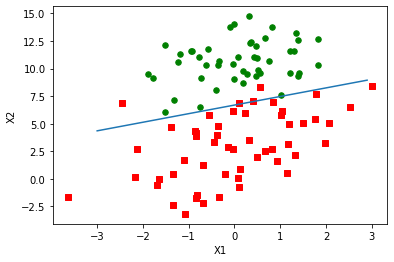

In [8]:
plotBestFit(weights.getA()) # weights是numpy矩阵，将其转为数组array

## 伪随机梯度上升SGA

梯度上升算法在每次更新回归系数时都需要遍历整个数据集，在小规模数据集上可用，但如果样本数和特征数很高，该方法的计算复杂度就太高了。

一种改进的方法是一次**仅用一个样本点来更新回归系数**，该方法称为 **随机梯度上升** 算法。

In [9]:
# 5-3 随机梯度上升算法

def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights)) # 区别：仅使用第i条数据用于更新系数
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i] # 区别：仅使用第i条数据用于更新系数
    return weights

array([ 1.01702007,  0.85914348, -0.36579921])

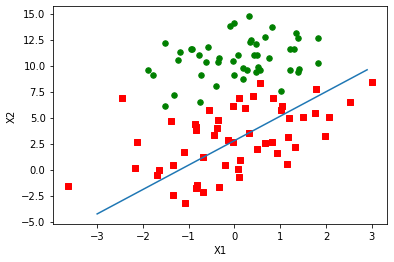

In [10]:
weights = stocGradAscent0(np.array(dataArr),labelMat)
display(weights)
plotBestFit(weights)

从可视化可以看出，区分的效果一般，误分现象比较严重。

这是因为执行一次`stocGradAscent0()`方法，实际上只是利用样本集的每条数据更新回归系数一次，而之前的`stocGradAscent()`迭代了500次，所以后者呈现的效果不佳，可以对这一过程进行迭代查看效果。

In [11]:
## 多次迭代再比较，看看真本事

def stocGradAscent0cycle(dataMatrix, classLabels,maxCycles = 200):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for k in range(maxCycles):
        for i in range(m):
            h = sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
    return weights

array([ 9.55333325,  0.87771989, -1.36118565])

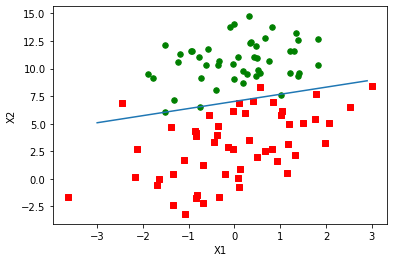

In [12]:
maxCycle = 500

weights_cycle = stocGradAscent0cycle(np.array(dataArr),labelMat,maxCycle)
display(weights_cycle)
plotBestFit(weights_cycle)

提升迭代次数到500次，最终分类效果尚可。

## 随机梯度上升SGA

实际上因为数据集本身并不是线性可分的，存在一些不能正确分类的样本点，在每次迭代时可能引发系数的一定程度的变化（图中的震荡）。另外也可以看出三个系数收敛的速度也不够快。针对这些问题，可以修改原伪随机梯度上升算法的实现来解决。

改进之处在于

1. 每次执行的步长 $\alpha$ 会进行随机调整。这样可以一定程度上消除某些样本点的影响。

2. 原伪随机算法中实际每轮迭代时是**顺序使用**了每一个样本点来做优化，而随机梯度上升应该是**随机选取**一个样本点来更新回归系数。这里便随机选择。当然，这还是一种无放回的采样。

In [13]:
# 5-4 改进的随机梯度上升算法

import random
def stocGradAscent10(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

array([13.8236416 ,  0.90622354, -1.88789608])

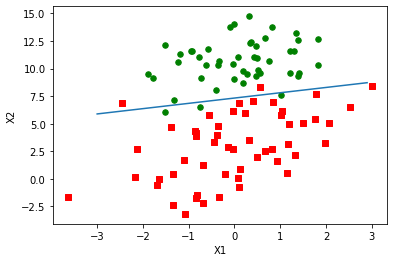

In [14]:
numIter = 500
weights = stocGradAscent10(np.array(dataArr),labelMat,numIter)
display(weights)
plotBestFit(weights)

同样的500轮迭代，最终效果还是不错的。

## 实战：疝气病症预测马死亡率（SGA实现）

《实战》直接提供了预处理过的数据，方法是对缺失值填充0，这么做的原因是sigmoid(0)=0.5，对分类结果没有倾向性。

In [15]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 0.004/(1.0+j+i)+0.0001    #alpha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

注意到处理后的文件是制表符分隔的txt文件，原代码使用按行读取文件、依次添加列表的方式我认为过于繁琐，这里替换为使用`pandas`的`read_csv()`读取，将参数进行适当调整即可。

In [16]:
# 5-5 Logistic回归分类函数
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

train = pd.read_csv('./data/horseColicTraining.txt',sep='\t',header=None)
trainingSet = train.iloc[:,:21];trainingLabels = train.iloc[:,21:].values.tolist() # 替换使用pandas，原代码略去
test = pd.read_csv('./data/horseColicTest.txt',sep='\t',header=None)
testSet = test.iloc[:,:21];testLabels = test.iloc[:,21:]
def colicTest(trainingSet,trainingLabels,testSet,testLabels): 
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 2000)
    errorCount = 0
    for index,row in testSet.iterrows():
        if int(classifyVector(np.array(row),trainWeights)) != int(testLabels.iloc[index,0]):
            errorCount += 1
    errorRate = (float(errorCount)/len(testSet))
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest(trainingSet,trainingLabels,testSet,testLabels):
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest(trainingSet,trainingLabels,testSet,testLabels)
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [17]:
%%time
multiTest(trainingSet,trainingLabels,testSet,testLabels)

the error rate of this test is: 0.417910
the error rate of this test is: 0.373134
the error rate of this test is: 0.373134
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.373134
the error rate of this test is: 0.373134
the error rate of this test is: 0.388060
the error rate of this test is: 0.373134
the error rate of this test is: 0.328358
after 10 iterations the average error rate is: 0.371642
CPU times: user 1min 39s, sys: 33.1 ms, total: 1min 39s
Wall time: 1min 39s


迭代10次，平均错误率约为0.32~0.35左右，因为原数据有近30%的缺失，所以这个成绩尚可。后续可尝试修改步长进行优化。

对 $\alpha$ 和迭代次数等进行调整，试图优化表现(i在0 ~ 299内变化，j在0 ~ 1000内变化。若分子为$10^0$量级，整体大约在 $10^{-1}$ ~ $10^{-3}$ 量级变化)：

| 步长 $\alpha$ | 迭代次数`numiter` | 错误率变化范围 | 10轮平均错误率 | 
| -------- | ---- | ----------------- | ------- |
| $\frac{4}{1+ij}$ | 1000 | 0.268657~0.432836 | 0.332836 |
| $\frac{4}{1+ij}$ | 2000 | 0.328358~0.417910 | 0.353731 |
| $\frac{0.04}{1+ij}$ | 2000 | 0.283582~0.328358 | 0.314925 |
| $\frac{0.004}{1+ij}$ | 2000 | 0.268657~0.298507 | 0.276119 |
| $\frac{0.0004}{1+ij}$ | 2000 | 0.402985~0.402985 | 0.402985 |
| $\frac{0.0004}{1+ij}$ | 10000 | 0.402985~0.402985 | 0.402985 |
| $\frac{0.004}{1+ij}$ | 5000 | 0.253731~0.313433 | 0.291045 |

最终优化的最优平均错误率约为0.28，对应的 $\alpha$ 量级在 $10^{-3}$ ~ $10^{-5}$，迭代次数2000.

## 小批量梯度上升MBGA

《实战》中并未给出小批量梯度上升的实现。

小批量梯度上升相比于批量梯度上升，每次随机选取训练集的小批量子集参与计算更新 $w$ 。这么做相比于普通的批量梯度上升，更新一次 $w$ 计算的量减少，能更快达到收敛；同时相比于随机梯度上升，只要`batch_size`设置合理，使用`numpy`优化的矩阵运算在执行速度上更快，收敛所需运算量也是类似的。

由于选取参与计算更新 $w$ 的子集时也是随机的，所以可以考虑直接修改原随机梯度上升的实现，只需改为根据`batch_size`随机选取适当样本参与计算。

In [18]:
def miniBatchGradAscent(dataMatrix, classLabels, numIter, batch_size):
    m,n = np.shape(dataMatrix)
    weights = np.ones((n,1))   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        rd = math.ceil(m / batch_size) #向上取整，总运算次数不小于样本数
        for i in range(rd):
            alpha = 0.00001 
            randIndices = sorted(random.sample(dataIndex,min(batch_size,len(dataIndex))))
            h = sigmoid(dataMatrix[randIndices]*weights)
            error = np.array(classLabels)[randIndices] - np.array(h)
            weights = weights + alpha * dataMatrix[randIndices].transpose() * error
            dataIndex = [i for i in dataIndex if i not in randIndices] # 无放回取样
    return weights

## 实战：疝气病症预测马死亡率（MBGA实现）

In [19]:
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTestMBGA(trainingSet,trainingLabels,testSet,testLabels,batch_size): 
    trainWeights = miniBatchGradAscent(np.mat(trainingSet), np.mat(trainingLabels), 2500, batch_size)
    errorCount = 0
    for index,row in testSet.iterrows():
        if int(classifyVector(np.array(row),trainWeights)) != int(testLabels.iloc[index,0]):
            errorCount += 1
    errorRate = (float(errorCount)/len(testSet))
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTestMBGA(trainingSet,trainingLabels,testSet,testLabels,batch_size=20):
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTestMBGA(trainingSet,trainingLabels,testSet,testLabels,batch_size)
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [20]:
%%time
multiTestMBGA(trainingSet,trainingLabels,testSet,testLabels,80)

the error rate of this test is: 0.253731
the error rate of this test is: 0.298507
the error rate of this test is: 0.253731
the error rate of this test is: 0.268657
the error rate of this test is: 0.253731
the error rate of this test is: 0.298507
the error rate of this test is: 0.253731
the error rate of this test is: 0.328358
the error rate of this test is: 0.268657
the error rate of this test is: 0.298507
after 10 iterations the average error rate is: 0.277612
CPU times: user 37.9 s, sys: 133 ms, total: 38 s
Wall time: 37.9 s


对实现的小批量梯度算法进行了多次实验：

| 步长 $\alpha$ | 迭代次数`numiter` |  batch_size | 错误率变化范围 | 10轮平均错误率 | 
| ------ | ---- | --- | -------------- | ------- |
| 0.00001 | 5000 | 20 | 0.238806~0.268657 | 0.250746 |
| 0.00001 | 3000 | 20 | 0.223881~0.268657 | 0.247761 |
| 0.00001 | 2500 | 20 | 0.238806~0.253731 | 0.250746 |
| 0.00001 | 2000 | 20 | 0.238806~0.328358 | 0.285075 |
| 0.00001 | 1500 | 20 | 0.283582~0.373134 | 0.335821 |
| 0.00003 | 2500 | 20 | 0.253731~0.313433 | 0.283582 |
| 0.00001 | 2500 | 80 | 0.238806~0.268657 | 0.252239 |

基于测试结果得出的MBGA最优错误率为0.25左右，对应步长量级为 $10^{-5}$ ，迭代次数在2000~2500次。就本例而言，MBGA在运算速度和最终优化效果上都**略胜于**SGA。

由于样本数量不是很多，所以并不能明显体现出运算量方面SGA和MGA的优劣，但是使用小批量梯度下降时，合理调整`batch_size`可以在一定程度上加快运算速度。

虽然样本数量不大，但是迭代次数非常多，在我的主机上难以记录完整的迭代过程，这是一例每轮迭代10次的10次测验（代码略去），每次迭代的不同参数对应的散点颜色不同，可以看到大约3~5次迭代就可以让某一参数收敛到一个较小的范围。

![index](https://downloads.mariozzj.cn/img/typora/index.png)

## BGA、SGA、MBGA对比

由于疝气病马数据的属性数量较多（21条），对应的权值参数也较多、计算耗时较大（从前面的计时可以看出执行一次可能要耗时1分钟），所以先选择最初的两列数据进行算法的对比。

$$
x_2 = \dfrac{-w_0 - w_1x_1}{w_2}
$$

考虑到实际控制决策平面方向的参数不是三个参数 $w_0$、$w_1$、$w_2$而是两个比值 $-\dfrac{w_0}{w_2}$ 、 $-\dfrac{w_1}{w_2}$，所以要展示整体回归系数的收敛情况，只需对这两个比值的变化情况进行分析即可。我在原来的方法中稍加改动，对每一次迭代的这两个比值进行记录。

In [21]:
def batchGradAscentV(dataMatIn, classLabels, maxCycles=500,alpha=0.001):
    dataMatrix = np.mat(dataMatIn)             
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    weights = np.ones((n,1))
    weights_arr = np.zeros(shape=(maxCycles,n-1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)  
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()* error
        weights_arr[k,:] = np.array([-weights[0,0]/weights[2,0] , -weights[1,0]/weights[2,0]])
    return np.array(weights).reshape(n,),weights_arr

def stocGradAscentV(dataMatrix, classLabels, numIter=500, alpha=0.001):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    weights_arr = np.zeros(shape=(numIter*m,n-1))
#     weights_arr = np.zeros(shape=(numIter*m,n))
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + ((4/(i+j+1)) + alpha) * error * dataMatrix[randIndex]
#             weights = weights + alpha * error * dataMatrix[randIndex]
            weights_arr[i+j*m,:] = np.array([-weights[0]/weights[2],-weights[1]/weights[2]])
            del(dataIndex[randIndex])
    return weights, weights_arr

def miniBatchGradAscentV(dataMatrix, classLabels, numIter=500, alpha=0.001, batch_size=10):
    dataMatrix = np.mat(dataMatrix)             
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    rd = math.ceil(m / batch_size) #向上取整，总运算次数不小于样本数
    weights = np.ones((n,1))
    weights_arr = np.zeros(shape=(numIter*rd,n-1))
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(rd):
            randIndices = sorted(random.sample(dataIndex,min(batch_size,len(dataIndex))))
            h = sigmoid(dataMatrix[randIndices]*weights)
            error = labelMat[randIndices] - h
            weights = weights + ((0.4/(i+j+1)) + alpha) * dataMatrix[randIndices].transpose() * error
#             weights = weights + alpha * dataMatrix[randIndices].transpose() * error
            dataIndex = [i for i in dataIndex if i not in randIndices] # 无放回取样
            weights_arr[i+j*rd,:] = np.array([-weights[0,0]/weights[2,0] , -weights[1,0]/weights[2,0]])
    return np.array(weights).reshape(n,), weights_arr

In [22]:
dataArr, labelMat = loadDataSet()
W_BGA, Ws_BGA = batchGradAscentV(np.array(dataArr),labelMat,500,0.001)
W_SGA, Ws_SGA = stocGradAscentV(np.array(dataArr),labelMat,500,0.001)
W_MBGA, Ws_MBGA = miniBatchGradAscentV(np.array(dataArr),labelMat,500,0.001,10)

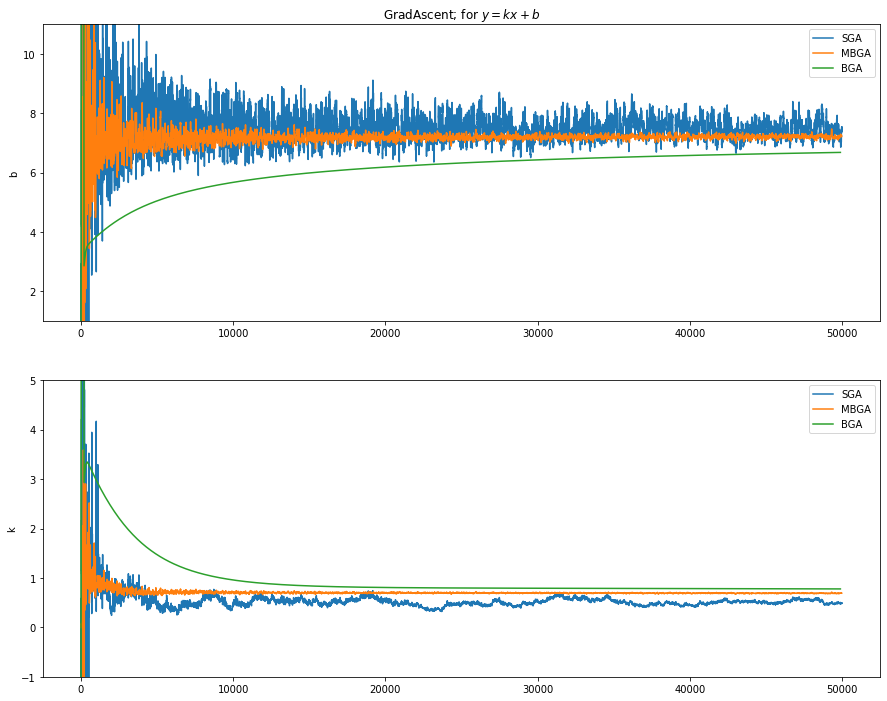

In [23]:
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(211)
ax1.set_title("GradAscent; for $y=kx+b$")
ax1.set_ylim((1,11));ax1.set_ylabel('b')
ax1.plot(np.arange(0,Ws_SGA.shape[0],1),Ws_SGA[:,0],label='SGA')
ax1.plot(np.arange(0,Ws_MBGA.shape[0]*10,10),Ws_MBGA[:,0],label='MBGA')
ax1.plot(np.arange(0,Ws_BGA.shape[0]*100,100),Ws_BGA[:,0],label='BGA')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.set_ylim((-1,5));ax2.set_ylabel('k')
ax2.plot(np.arange(0,Ws_SGA.shape[0],1),Ws_SGA[:,1],label='SGA')
ax2.plot(np.arange(0,Ws_MBGA.shape[0]*10,10),Ws_MBGA[:,1],label='MBGA')
ax2.plot(np.arange(0,Ws_BGA.shape[0]*100,100),Ws_BGA[:,1],label='BGA')
ax2.legend()

在进行可视化时,将三张图进行了合并,并对横坐标进行适当的放缩,使得同运算量情况下三种算法的图像可重叠.

从图中可以看出,回归线斜率 $k$ 和纵截距 $b$ 在迭代过程中不断收敛,收敛速度方面,同等运算量情况下小批量梯度上升MBGA和随机梯度上升SGA要快于批量梯度上升BGA.

迭代中后期,MBGA和SGA均会出现小幅度震荡,后者震荡幅度稍大,这是因为随机梯度下降较容易受个别样本/噪声的影响.

前期波动比较明显的原因,一是随机选取 $\alpha$ 的方法在迭代之初使之会有较大的值,二是迭代之初上升速度(导数)都较快.

《实战》认为这样一种在线学习的方式（`gradAscent1()`）比批处理的方式（`gradAscent()`）“所使用的计算量更少”，但是仅就提供的代码而言，如果迭代轮数相同，我认为二者的运算量相同，而且批处理方式由于用到了矩阵运算（`numpy`有优化，且在多核硬件如GPU上有加速效果）实际上执行速度要快于前者。

查阅相关资料得知，得出*SGA收敛速度快于BGA*这一结论的原因是，就权重参数的更新频率而言，遍历一轮所有样本，BGA仅更新了一次 $w$ ，而SGA由于是用每一条数据更新，实际上更新了训练集样本数量等量次数的 $w$ ，在这一过程中（尤其是训练集样本数非常大时），有可能 $w$ 早已收敛。另外就运算速度而言,相等运算量的情况下SGA和MBGA更新的 $w$ 次数也更多.

如果目标都是迭代、收敛、获得最优解：

1. BGA：每次更新权重参数都需要所有样本参与

    优点：

    * 最终表现可能是最佳的
    * 使用矩阵进行运算，在外部库或硬件优化的情况下可能有较快速度。

    缺点：

    * 权重参数更新次数较少，得到最优解对应的计算量较大。


2. SGA：每次更新权重参数随机选取1个样本参与

    优点：

    * 权重参数更新次数较多，能以较小运算量达到收敛
    * 在线学习、增量学习。

   缺点：

    * 容易受个别样本例如噪声数据影响，准确性降低。


3. MBGA：每次更新权重参数随机选取一部分样本参与

    综合了BGA较好的准确率表现和并行运算加成，同时也可控制 $w$ 的更新次数在一个不低的水平，能相对较快收敛。
    
另外,我认为呈现如图规律的因素很多,不可忽视的是本次实验中实现SGA和MBGA时对 $\alpha$ 进行了灵活变换处理.另做探究实验锁定 $\alpha$ 为常量(与BGD维持同一水平)时,呈现规律如下(代码更改略)

![另一种规律](https://downloads.mariozzj.cn/img/picgo/index1.png)

从收敛速度方面而言,三者就难分伯仲了.

# scikit-learn实现Logistic回归
```Python
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001,
 C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
 solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False,
                                              n_jobs=None, l1_ratio=None)
```

* `solver` 构造函数，指定逻辑回归损失函数的优化方法。
    * `liblinear`：坐标轴下降法，对于大多数少样本情况都适用。一般用于二分类。
    * `sag`：随机平均梯度下降(Stochastic Average Gradient Descent)，在大规模数据集上运算较快。
    * `saga`：优化的无偏估计的sag.
    * 其他：`lbfgs`、`newton-cg`。

* `penalty`损失函数惩罚参数
    * `l1`：支持`liblinear`、`saga`；
    * `l2`：支持`newton-cg`、`lbfgs`、`sag`、`saga`；
    * `none`：`newton-cg`、`lbfgs`、`sag`、`saga` ;
    * `elasticnet`：仅`saga`。

* `tol`停止迭代求解的阈值

* `C`正则化系数倒数。

    正浮点数。
    
    越小模型的泛化能力越强，同时更易欠拟合。
    
* `max_iter`最大迭代次数

* `multiclass`多分类

    * `auto`
    * `ovr`：可用二分类方法解决多分类问题（分正负例）
    * `multinomial`：建立多个二分类模型综合实现多分类

就疝气病马数据可体验参数调节。


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
%%time
lr = LogisticRegression(solver='liblinear',penalty='l1')
lr.fit(np.array(trainingSet),np.array(trainingLabels).ravel())
lr.score(np.array(testSet),np.array(testLabels).ravel())

CPU times: user 6.62 ms, sys: 3 µs, total: 6.63 ms
Wall time: 6.32 ms


0.7313432835820896

In [26]:
lr = LogisticRegression(solver='sag',penalty='l2')
lr.fit(np.array(trainingSet),np.array(trainingLabels).ravel())
lr.score(np.array(testSet),np.array(testLabels).ravel())

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7761194029850746

出现报错，迭代未收敛，此时我们需要调整`max_iter`参数或者`tol`参数使之收敛。

In [27]:
%%time
lr = LogisticRegression(solver='sag',penalty='l2',max_iter=1600)
lr.fit(np.array(trainingSet),np.array(trainingLabels).ravel())
lr.score(np.array(testSet),np.array(testLabels).ravel())

CPU times: user 100 ms, sys: 0 ns, total: 100 ms
Wall time: 98.9 ms


0.7313432835820896

调大迭代次数，最终测试的收敛迭代次数大约在1600次。当然降低误差阈值也可以快速收敛。

In [28]:
lr = LogisticRegression(solver='sag',penalty='l2',tol=0.01)
lr.fit(np.array(trainingSet),np.array(trainingLabels).ravel())
lr.score(np.array(testSet),np.array(testLabels).ravel())

0.7761194029850746

# 实验总结

1. 完成了本次实验要求的各项目标，通过阅读、理解、复现、修改《实战》代码，基本掌握了Logistic回归中常用到的最优化回归系数方法的思想并总结：

> 如果目标都是迭代、收敛、获得最优解：
>
>    1. BGA（批量梯度上升）：每次更新权重参数都需要所有样本参与
>
>        优点：
>
>        * 最终表现可能是最佳的
>        * 使用矩阵进行运算，在外部库或硬件优化的情况下可能有较快速度。
>
>      缺点：
>
>        * 权重参数更新次数较少，得到最优解对应的计算量较大。
>
>
>    2. SGA（随机梯度上升）：每次更新权重参数随机选取1个样本参与
>
>        优点：
>
>        * 权重参数更新次数较多，能以较小运算量达到收敛
>        * 在线学习、增量学习。
>
>       缺点：
>
>        * 容易受个别样本例如噪声数据影响，准确性降低。
>
>
>    3. MBGA（小批量梯度上升）：每次更新权重参数随机选取一部分样本参与
>
>        综合了BGA较好的准确率表现和并行运算加成，同时也可控制 $w$ 的更新次数在一个不低的水平，能相对较快收敛。

同时，反思了《实战》中部分说法的不合理之处，并进行分析，进一步理解了三种最优化方法的优势和劣势。

2. Logistic回归本身是寻找非线性函数（sigmoid）的最佳拟合参数，这一参数求解过程就可使用上述方法来完成。Logistic函数本身由于其函数数学特征适用于二分类问题，同时，由于我们已经求解出了函数的拟合参数，也就是获得了表达式，就可以用该函数去预测新样本。看起来分类问题和回归问题非常相似，都是要去寻找一个映射（函数）用于判断新样本的取值或分类，但是我认为二者的根本区别在于损失的判断上，分类问题只需要判断结果的对错，并以该结果影响训练；而回归问题，如本次实验中计算回归参数时，需要计算每一次拟合的误差值，并用误差去指导下一轮参数的计算。
